In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

## Selfie dataset

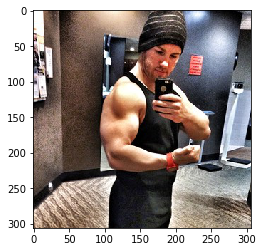

In [2]:
# attemp to view ain image
img = plt.imread('./Selfie-dataset/images/ffb33a90b06911e3b2a4120e4e51d427_6.jpg')
plt.imshow(img)
plt.show()

In [3]:
!head -3 Selfie-dataset/selfie_dataset.txt

00a454da495e11e28a7322000a1fa414_6 3.901 1 1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
00cddb96ac4c11e3a30212279ba1b65f_6 4.385 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
01cdd7aa1a1a11e2aaa822000a1fb0dd_6 4.243 -1 1 -1 -1 1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1


In [4]:
!cat Selfie-dataset/README.txt



Using the Selfie dataset must be limited only to the research purposes

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

selfie_dataset.txt provides the annotations and is structured as <image name> <popularity score> <attributes>

Attributes are as following:

partial_faces is_female baby child teenager youth middle_age senior white black asian oval_face round_face heart_face smiling mouth_open frowning wearing_glasses wearing_sunglasses wearing_lipstick tongue_out duck_face black_hair blond_hair brown_hair red_hair curly_hair straight_hair braid_hair showing_cellphone using_earphone using_mirror braces wearing_hat harsh_lighting dim_lighting

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

If you make use of the Selfie dataset please cite the following work:

@inproceedings{kalayeh2015selfie,
  title={How to Take a Good Selfie?},
  author={Kalayeh, Mahdi M and Seifu, Misrak and LaLanne, Wesna and Shah, Mubarak},
  booktitle={Proceedings of the 23rd Annual ACM Conference on Multime

In [5]:
features = 'partial_faces is_female baby child teenager youth middle_age senior white black asian oval_face round_face heart_face smiling mouth_open frowning wearing_glasses wearing_sunglasses wearing_lipstick tongue_out duck_face black_hair blond_hair brown_hair red_hair curly_hair straight_hair braid_hair showing_cellphone using_earphone using_mirror braces wearing_hat harsh_lighting dim_lighting'
features = features.split(' ')
columns = ['image_name', 'popularity_score']
columns.extend(features)

In [6]:
# metadata
metadata = pd.read_csv('Selfie-dataset/selfie_dataset.txt', names=columns, sep=' ')
metadata.image_name = metadata.image_name + '.jpg'

In [7]:
metadata.head()

image_name  popularity_score  partial_faces  \
0  00a454da495e11e28a7322000a1fa414_6.jpg             3.901              1   
1  00cddb96ac4c11e3a30212279ba1b65f_6.jpg             4.385              1   
2  01cdd7aa1a1a11e2aaa822000a1fb0dd_6.jpg             4.243             -1   
3  024696bead0c11e389d50ec42b3b1b1c_6.jpg             4.169             -1   
4  026df048221a11e2b52122000a1fa4b5_6.jpg             3.873             -1   

   is_female  baby  child  teenager  youth  middle_age  senior  ...  \
0          1    -1     -1        -1      1          -1      -1  ...   
1          1    -1     -1        -1     -1          -1      -1  ...   
2          1    -1     -1         1     -1          -1      -1  ...   
3         -1    -1     -1         1     -1          -1      -1  ...   
4          1    -1     -1        -1     -1           1      -1  ...   

   curly_hair  straight_hair  braid_hair  showing_cellphone  using_earphone  \
0          -1             -1          -1                 -1              -1   
1          -1             -1          -1                 -1              -1   
2          -1             -1          -1                 -1              -1   
3          -1             -1          -1                 -1              -1   
4          -1              1          -1                 -1              -1   

   using_mirror  braces  wearing_hat  harsh_lighting  dim_lighting  
0            -1      -1           -1              -1            -1  
1            -1      -1           -1              -1            -1  
2            -1      -1           -1              -1            -1  
3            -1      -1           -1              -1            -1  
4            -1      -1           -1              -1            -1  

[5 rows x 38 columns]

In [8]:
for col in features:
    print('='*60)
    print(metadata[col].value_counts())

-1    36944
 1     9892
Name: partial_faces, dtype: int64
 1    33655
-1    11572
 0     1609
Name: is_female, dtype: int64
-1    46640
 1      196
Name: baby, dtype: int64
-1    46040
 1      796
Name: child, dtype: int64
-1    40561
 1     6275
Name: teenager, dtype: int64
 1    31644
-1    15192
Name: youth, dtype: int64
-1    45717
 1     1119
Name: middle_age, dtype: int64
-1    46820
 1       16
Name: senior, dtype: int64
 1    26024
-1    20812
Name: white, dtype: int64
-1    44515
 1     2321
Name: black, dtype: int64
-1    43705
 1     3131
Name: asian, dtype: int64
 1    26758
-1    20078
Name: oval_face, dtype: int64
-1    40604
 1     6232
Name: round_face, dtype: int64
-1    41387
 1     5449
Name: heart_face, dtype: int64
-1    34629
 1    12207
Name: smiling, dtype: int64
-1    45017
 1     1819
Name: mouth_open, dtype: int64
-1    46388
 1      448
Name: frowning, dtype: int64
-1    42902
 1     3934
Name: wearing_glasses, dtype: int64
-1    43777
 1     3059
Name: wear

In [9]:
img_folder = 'Selfie-dataset/images'
filenames = os.listdir(img_folder)

In [10]:
for file in filenames:
    if '.jpg' not in file:
        print(file)

In [11]:
len(filenames)

46836

In [12]:
from PIL import Image
img_shape = []
for file in filenames:
    if '.jpg' in file:
        file_path = os.path.join(img_folder, file)
        img_size = Image.open(os.path.join(img_folder, file)).size
        row = {'image_name': file, 'image_width': img_size[0], 'image_height': img_size[1]}
        img_shape.append(row)
        
img_shapeDF = pd.DataFrame(img_shape)
print(img_shapeDF.shape)
print(img_shapeDF.image_width.value_counts())
print(img_shapeDF.image_height.value_counts())

(46836, 3)
306    46836
Name: image_width, dtype: int64
306    46836
Name: image_height, dtype: int64


In [13]:
# top popular images
df = metadata[['image_name', 'popularity_score']].sort_values(by='popularity_score', ascending=False).iloc[:6]
df

image_name  popularity_score
16010  10246193_759902524032108_1348424338_a.jpg             6.714
39120   1963114_301256976694700_2141824347_a.jpg             6.675
35470    1530880_228950607299048_780223704_a.jpg             6.647
16286  10246216_225806710949506_1009821884_a.jpg             6.594
18928  10251490_624463514296682_1569950976_a.jpg             6.567
36285     1596805_642624365807253_25061753_a.jpg             6.511

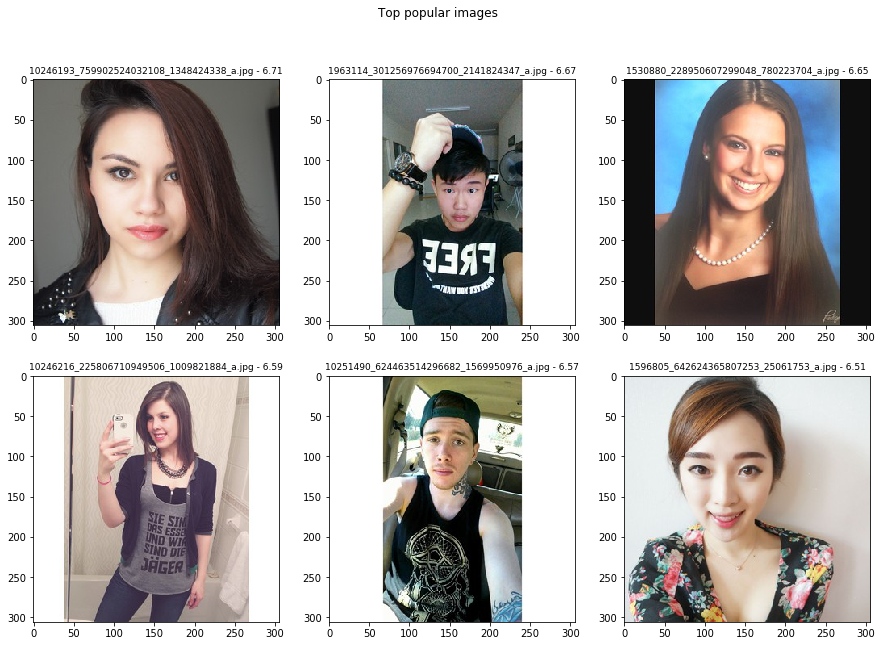

In [14]:
plt.figure(figsize=(15,10))
i = 1
for _, row in df.iterrows():
    plt.subplot(2,3,i)
    plt.imshow(plt.imread('./Selfie-dataset/images/' + row['image_name']))
    plt.title('%s - %.2f'%(row['image_name'], row['popularity_score']), fontsize=9)
    i+=1

plt.suptitle('Top popular images')
plt.show()

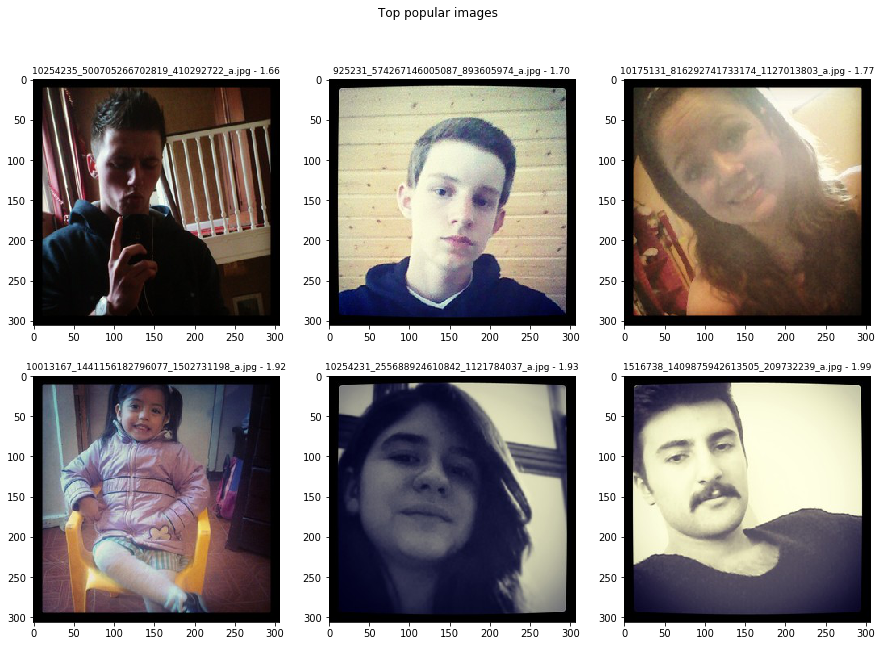

In [15]:
# less popular images
df = metadata[['image_name', 'popularity_score']].sort_values(by='popularity_score', ascending=True).iloc[:6]
df
plt.figure(figsize=(15,10))
i = 1
for _, row in df.iterrows():
    plt.subplot(2,3,i)
    plt.imshow(plt.imread('./Selfie-dataset/images/' + row['image_name']))
    plt.title('%s - %.2f'%(row['image_name'], row['popularity_score']), fontsize=9)
    i+=1

plt.suptitle('Less popular images')
plt.show()

/home/hung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


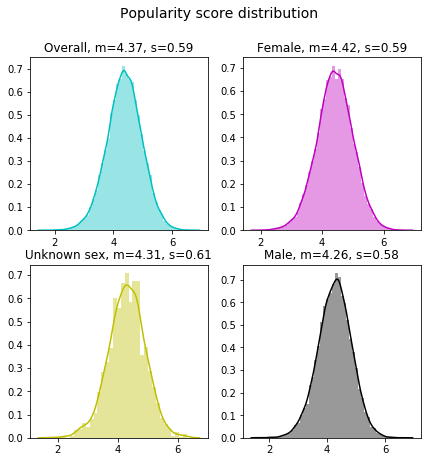

In [16]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
sns.distplot(a=metadata.popularity_score, color='c')
plt.title('Overall, m=%.2f, s=%.2f' % (metadata.popularity_score.mean(), metadata.popularity_score.std()))
plt.xlabel('')

plt.subplot(2,2,2)
dfa = metadata[metadata.is_female == 1]
sns.distplot(a=dfa.popularity_score, color='m')
plt.title('Female, m=%.2f, s=%.2f' % (dfa.popularity_score.mean(), dfa.popularity_score.std()))
plt.xlabel('')

plt.subplot(2,2,3)
dfa = metadata[metadata.is_female == 0]
sns.distplot(a=dfa.popularity_score, color='y')
plt.title('Unknown sex, m=%.2f, s=%.2f' % (dfa.popularity_score.mean(), dfa.popularity_score.std()))
plt.xlabel('')

plt.subplot(2,2,4)
dfa = metadata[metadata.is_female == -1]
sns.distplot(a=dfa.popularity_score, color='k')
plt.title('Male, m=%.2f, s=%.2f' % (dfa.popularity_score.mean(), dfa.popularity_score.std()))
plt.xlabel('')

plt.suptitle('Popularity score distribution', fontsize=14) 
plt.show()

In [17]:
# build linear regression model
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(metadata[features], metadata[['popularity_score']],
                                                   test_size=0.2, random_state=42)

lr = LR()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train RMSE: 0.5837955581658315
Test RMSE: 0.5774719925477693


In [19]:
# PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=4, random_state=42)

# decompose feature data
X = pca.fit_transform(metadata[features])

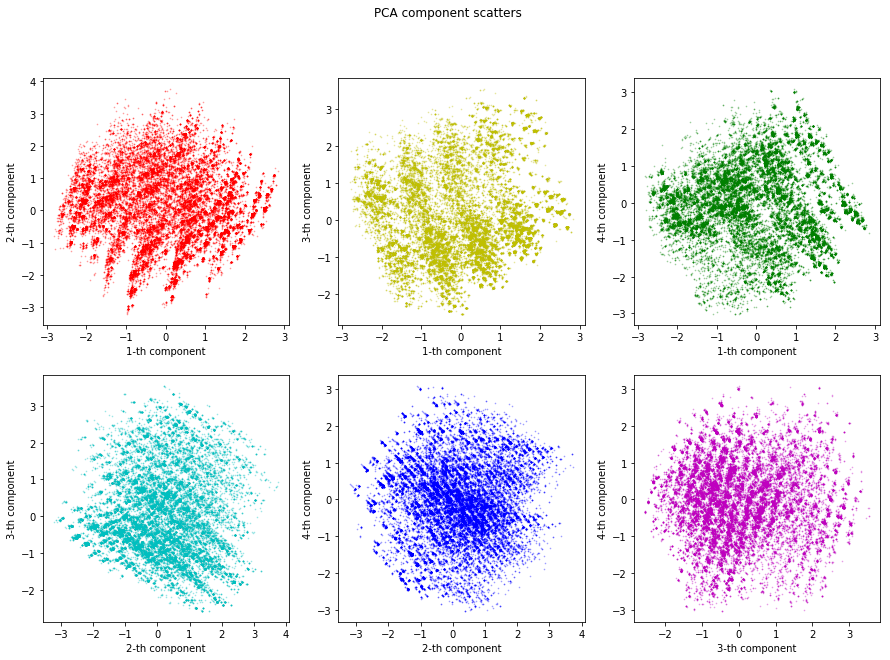

In [20]:
plt.figure(figsize=(15,10))
index = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
color = ['r','y','g','c','b','m']
for i in range(0, 6):
    plt.subplot(2,3, i+1)
    plt.scatter(X[:, index[i][0]], X[:, index[i][1]], s=0.5, c=color[i], alpha=0.3)
    plt.xlabel('%d-th component' % (index[i][0]+1))
    plt.ylabel('%d-th component' % (index[i][1]+1))
plt.suptitle('PCA component scatters')
plt.show()

## SCUT-FBP5500_v2 dataset

In [21]:
img_folder = './SCUT-FBP5500_v2/Images/'
scores = pd.read_csv('SCUT-FBP5500_v2/train_test_files/All_labels.txt', 
                    sep=' ', names=['image_name', 'rating'])
scores['group'] = scores.image_name.apply(lambda name: name[:2])

In [22]:
scores.head()

image_name    rating group
0   CF437.jpg  2.883333    CF
1  AM1384.jpg  2.466667    AM
2  AM1234.jpg  2.150000    AM
3  AM1774.jpg  3.750000    AM
4   CF215.jpg  3.033333    CF

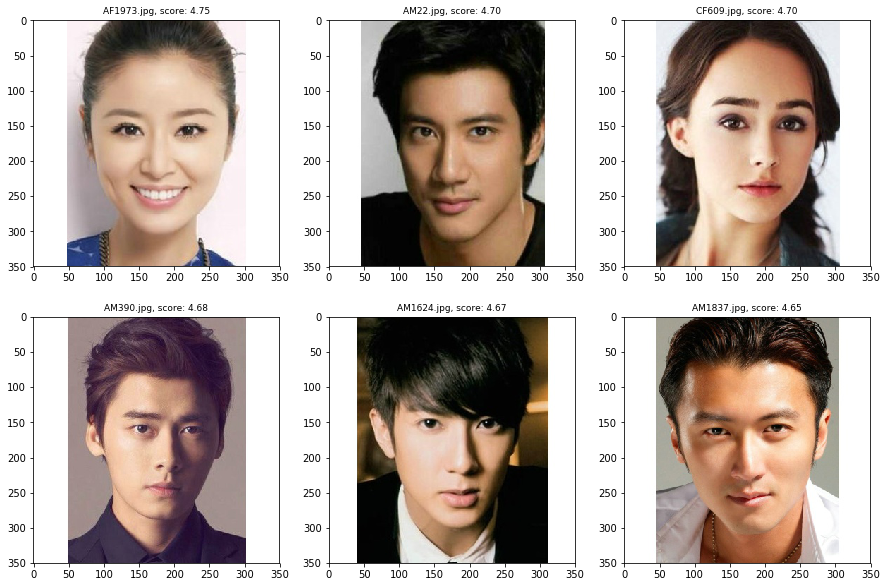

In [23]:
# most rating img
i=1
plt.figure(figsize=(15,10))
for img in scores.sort_values(by='rating', ascending=False).image_name.iloc[0:6]:
    plt.subplot(2,3,i)
    plt.imshow(plt.imread(os.path.join(img_folder, img)))
    plt.title(img+ ', score: %.2f' % scores[scores.image_name==img].rating.iat[0], fontsize=9)
    i += 1

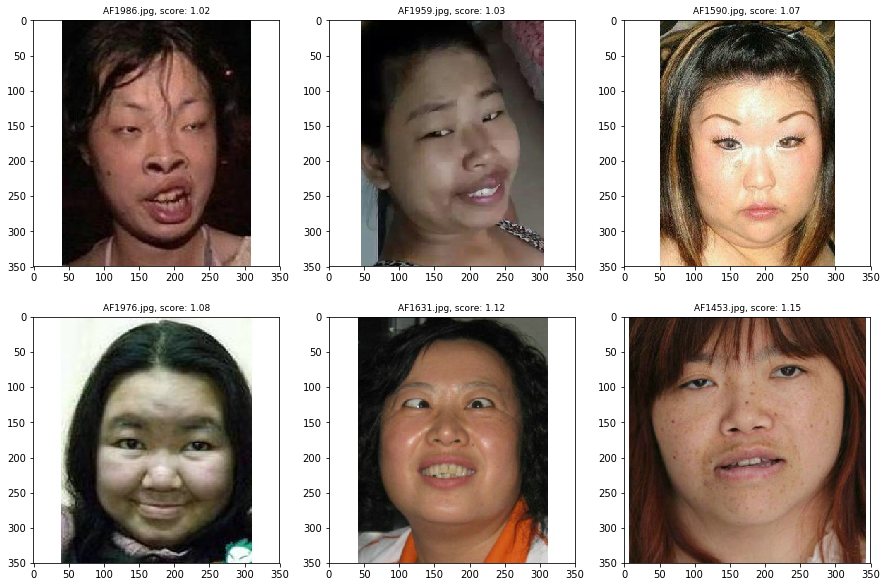

In [24]:
# last rating img
i=1
plt.figure(figsize=(15,10))
for img in scores.sort_values(by='rating', ascending=True).image_name.iloc[0:6]:
    plt.subplot(2,3,i)
    plt.imshow(plt.imread(os.path.join(img_folder, img)))
    plt.title(img+ ', score: %.2f' % scores[scores.image_name==img].rating.iat[0], fontsize=9)
    i += 1

In [25]:
scores.group.value_counts()

AM    2000
AF    2000
CF     750
CM     750
Name: group, dtype: int64

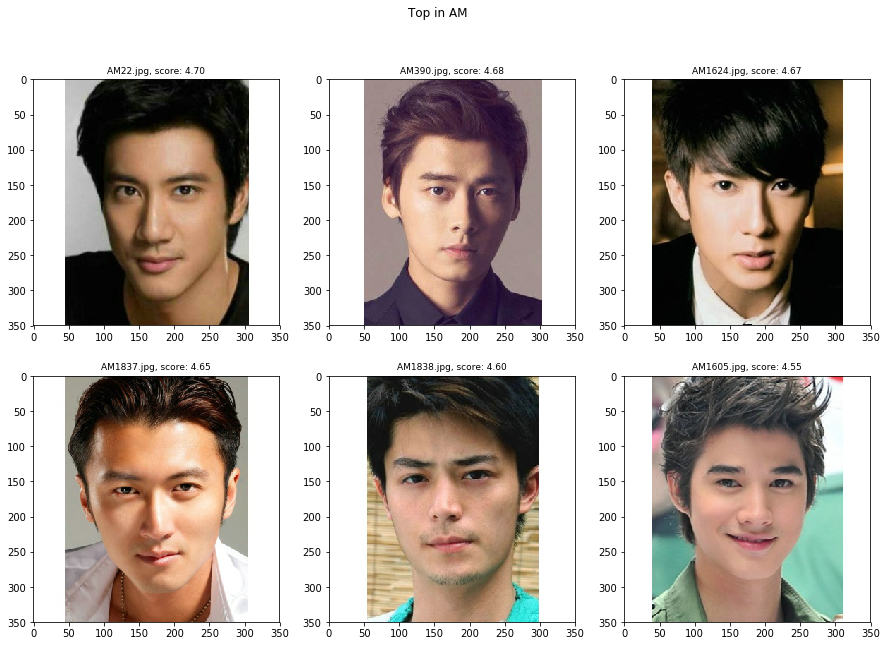

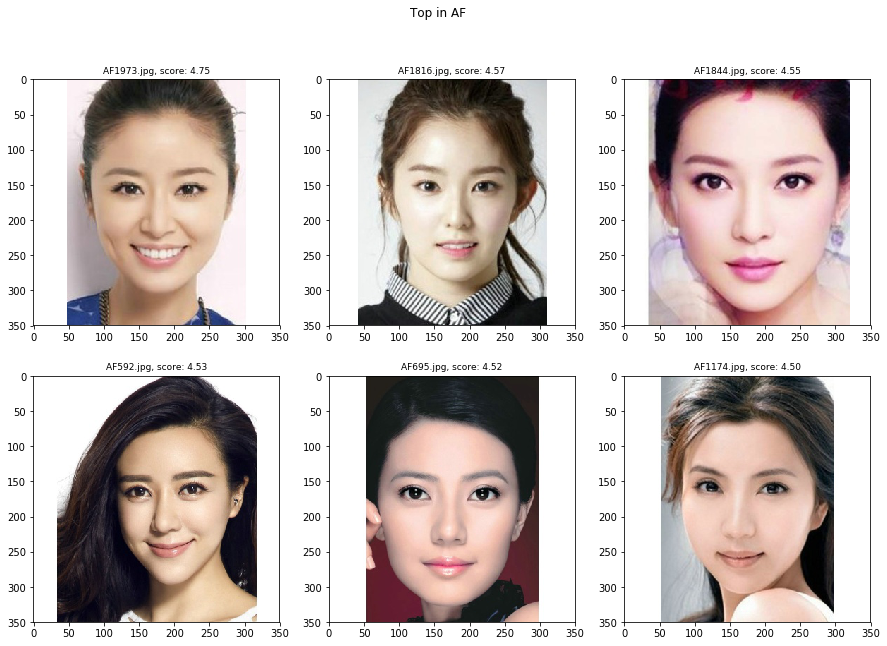

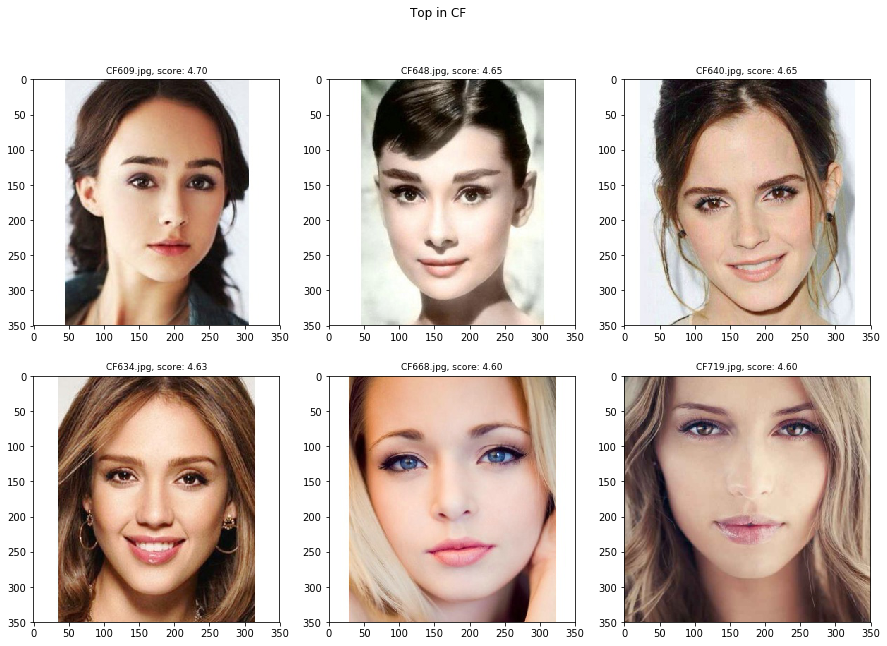

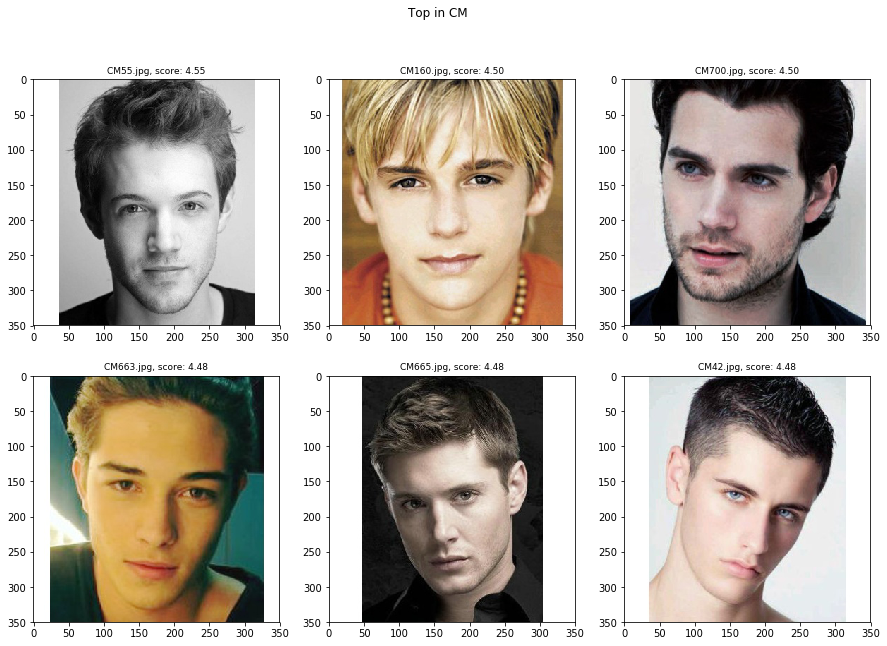

In [26]:
# most rating img in each group
for group in scores.group.value_counts().keys():
    i = 1
    plt.figure(figsize=(15,10))
    for img in scores[scores.group == group].sort_values(by='rating', ascending=False).image_name.iloc[0:6]:
        plt.subplot(2,3,i)
        plt.imshow(plt.imread(os.path.join(img_folder, img)))
        plt.title(img+ ', score: %.2f' % scores[scores.image_name==img].rating.iat[0], fontsize=9)
        plt.suptitle('Top in %s' %group)
        i += 1

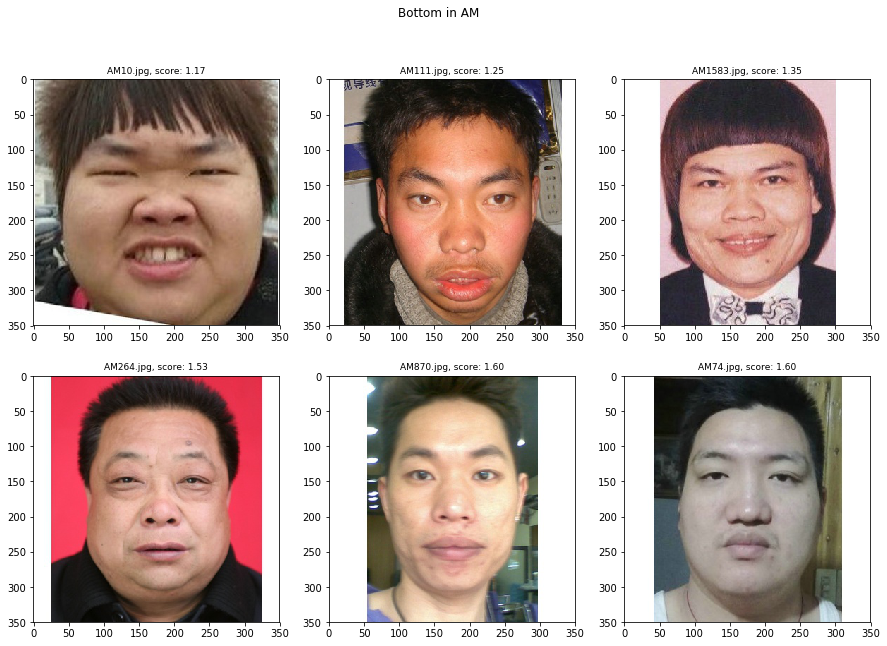

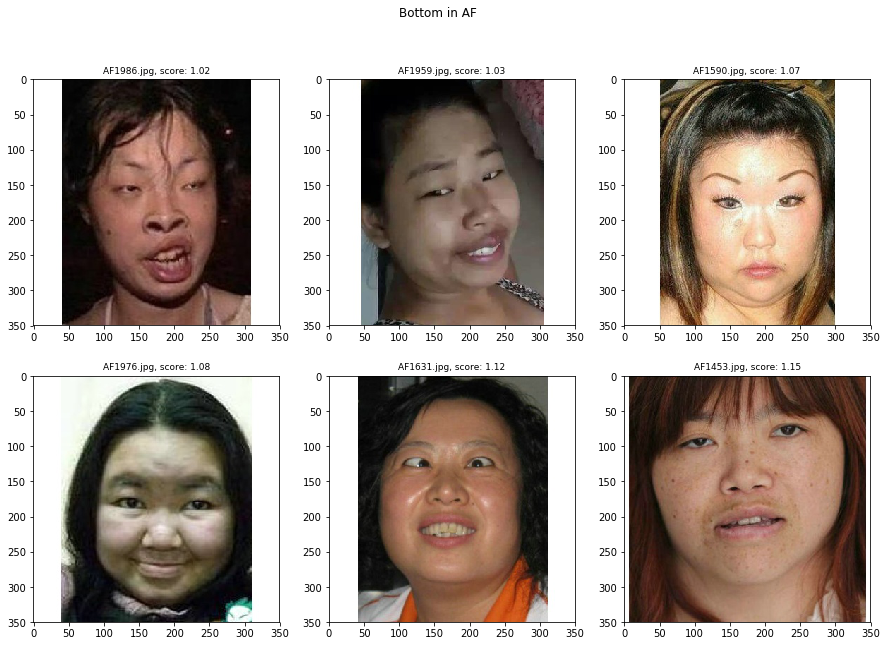

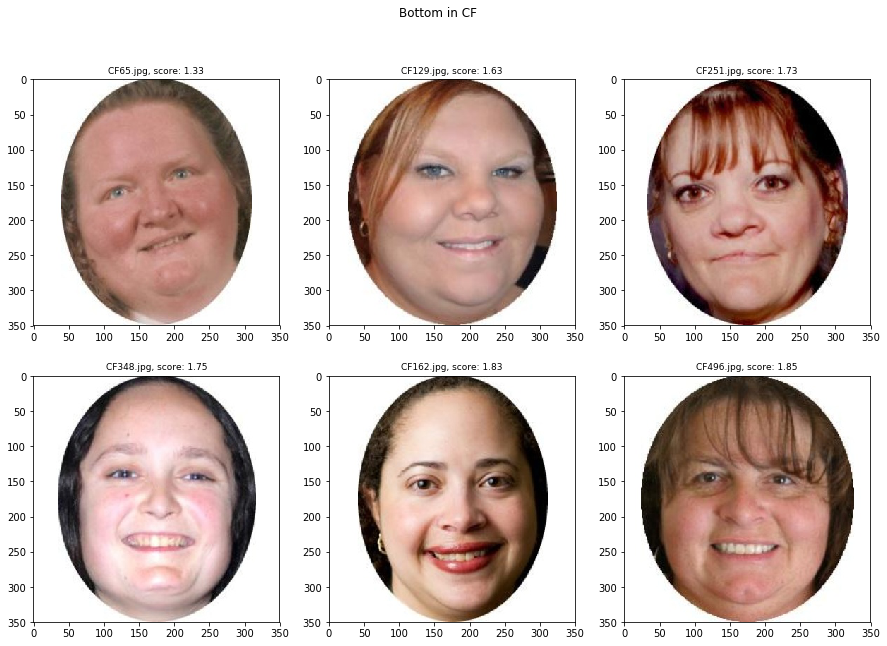

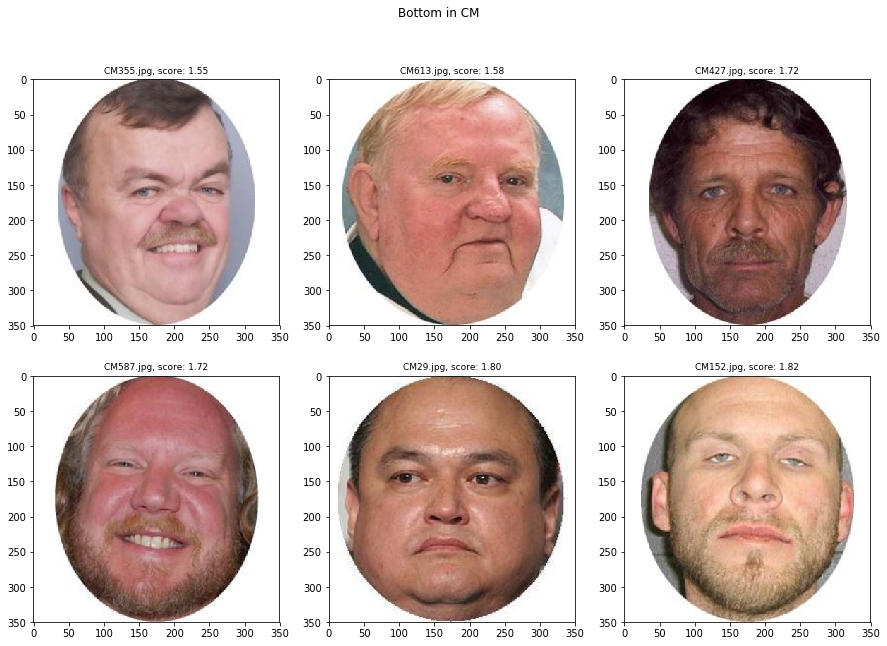

In [27]:
# less rating img in each group
for group in scores.group.value_counts().keys():
    i = 1
    plt.figure(figsize=(15,10))
    for img in scores[scores.group == group].sort_values(by='rating').image_name.iloc[0:6]:
        plt.subplot(2,3,i)
        plt.imshow(plt.imread(os.path.join(img_folder, img)))
        plt.title(img+ ', score: %.2f' % scores[scores.image_name==img].rating.iat[0], fontsize=9)
        plt.suptitle('Bottom in %s' %group)
        i += 1

/home/hung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


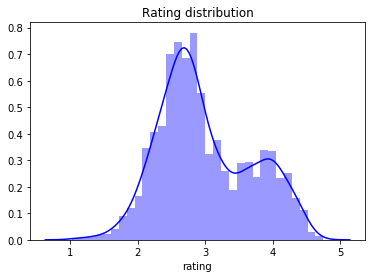

In [28]:
# rating distribution
plt.figure()
sns.distplot(a=scores.rating, color='b')
plt.title('Rating distribution')
plt.show()

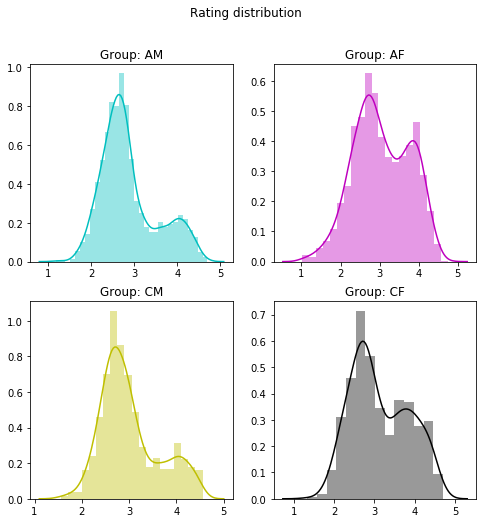

In [29]:
# rating distribution
groups = ['AM', 'AF', 'CM', 'CF']
col = ['c', 'm', 'y', 'k']
plt.figure(figsize=(8,8))
for i in range(4):
    gr = groups[i]
    plt.subplot(2,2,i+1)
    sns.distplot(a=scores[scores.group==gr].rating, color=col[i])
    plt.title('Group: ' + gr)
    plt.xlabel('')
plt.suptitle('Rating distribution')    
plt.show()

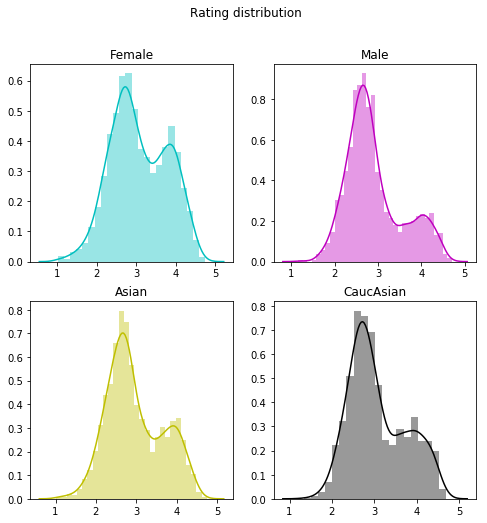

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
dfa = scores[scores.group.apply(lambda gr: 'F' in gr)]
sns.distplot(a=dfa.rating, color='c')
plt.title('Female')
plt.xlabel('')

plt.subplot(2,2,2)
dfa = scores[scores.group.apply(lambda gr: 'M' in gr)]
sns.distplot(a=dfa.rating, color='m')
plt.title('Male')
plt.xlabel('')

plt.subplot(2,2,3)
dfa = scores[scores.group.apply(lambda gr: 'A' in gr)]
sns.distplot(a=dfa.rating, color='y')
plt.title('Asian')
plt.xlabel('')

plt.subplot(2,2,4)
dfa = scores[scores.group.apply(lambda gr: 'C' in gr)]
sns.distplot(a=dfa.rating, color='k')
plt.title('CaucAsian')
plt.xlabel('')

plt.suptitle('Rating distribution')    
plt.show()